In [189]:
TEST_DATE = "2024-07-08"
TEST_FOLDER = "test2"
TEMP_FILE = "temp2.nc"
WIND_FILE = "windspeed2.nc"
PRECIP_FILE = "precipitation2.nc"

# CLLMate: Multimodal LLM for Weather and Climate Events Forecasting
## Complete Implementation and Analysis

This notebook combines all implementation files and provides a comprehensive analysis of the CLLMate methodology for processing meteorological raster data and generating textual climate event predictions.

## Table of Contents
1. [Overview and Architecture](#overview)
2. [Data Processing Pipeline](#data-processing)
3. [Feature Detection and Enhancement](#feature-detection)
4. [Visual Encoding Pipeline](#visual-encoding)
5. [Implementation Status](#implementation-status)
6. [Complete Working Example](#complete-example)
7. [Gap Analysis and Next Steps](#gap-analysis)

---

## 1. Overview and Architecture {#overview}

### CLLMate Research Paper Summary
The CLLMate paper introduces a novel approach to **Weather and Climate Event Forecasting (WCEF)** that:
- Converts meteorological raster data (Temperature, Wind U/V, Precipitation) into RGB images
- Uses CLIP vision encoder to extract visual features
- Aligns these features with LLM embedding space
- Generates textual event predictions directly

### Current Implementation Status
Your current implementation includes:
✅ **Data preprocessing and RGB conversion**  
✅ **CLIP feature extraction**  
✅ **Enhanced pattern detection (SCAFET-inspired)**  
✅ **Visual feature analysis**  
⚠️ **Partial multimodal alignment**  
❌ **Complete LLM integration and training**

---

## 2. Data Processing Pipeline {#data-processing}

### 2.1 RGB Image Generation

In [190]:
# From rgb_image_script.py
import xarray as xr
import numpy as np
from PIL import Image
import datetime
import os

# Load datasets
temp_ds = xr.open_dataset(TEMP_FILE)
precip_ds = xr.open_dataset(PRECIP_FILE)
wind_ds = xr.open_dataset(WIND_FILE)

# Extract variable names
temp_var = "T2M"
precip_var = "PRECTOTCORR"
wind_var = "WS10M"

# Function to normalize data to 0–255 (following CLLMate methodology)
def normalize(data):
    """
    Normalize meteorological data following CLLMate paper specifications
    """
    arr = data.values
    arr = np.nan_to_num(arr, nan=0.0)
    min_val, max_val = np.percentile(arr, 2), np.percentile(arr, 98)
    norm = (arr - min_val) / (max_val - min_val)
    norm = np.clip(norm, 0, 1)
    return (norm * 255).astype(np.uint8)

# Process daily data for entire year
def create_daily_rgb_images():
    """Generate RGB images for each day following CLLMate format"""
    # os.makedirs("rgb_images", exist_ok=True)
    test_folder = TEST_FOLDER
    os.makedirs(f"{test_folder}/rgb_images", exist_ok=True)
    start_date = datetime.date(2024, 1, 1)
    end_date = datetime.date(2024, 12, 31)
    delta = datetime.timedelta(days=1)
    
    current_date = start_date
    processed_count = 0
    
    while current_date <= end_date:
        date_str = current_date.isoformat()
        try:
            date_np = np.datetime64(current_date)
            
            # Extract meteorological data for the date
            temp_data = temp_ds[temp_var].sel(time=date_np, method="nearest")
            precip_data = precip_ds[precip_var].sel(time=date_np, method="nearest")
            wind_data = wind_ds[wind_var].sel(time=date_np, method="nearest")
            
            # Create RGB channels (T=Red, W=Green, P=Blue)
            R = normalize(temp_data)  # Temperature → Red
            G = normalize(wind_data)  # Wind Speed → Green  
            B = normalize(precip_data) # Precipitation → Blue
            
            # Stack into RGB image
            rgb_image = np.stack([R, G, B], axis=-1)
            img = Image.fromarray(rgb_image)
            img.save(f"{test_folder}/rgb_images/rgb_image_{date_str}.png")       
            print(f"Saved: {test_folder}/rgb_images/rgb_image_{date_str}.png")      
            processed_count += 1
            if processed_count % 30 == 0:
                print(f"Processed {processed_count} days...")
                
        except Exception as e:
            print(f"Skipped {date_str}: {e}")
        
        current_date += delta
    
    print(f"Total processed: {processed_count} RGB images")

# Execute RGB generation
create_daily_rgb_images()

Saved: test2/rgb_images/rgb_image_2024-01-01.png
Saved: test2/rgb_images/rgb_image_2024-01-02.png
Saved: test2/rgb_images/rgb_image_2024-01-03.png
Saved: test2/rgb_images/rgb_image_2024-01-04.png
Saved: test2/rgb_images/rgb_image_2024-01-05.png
Saved: test2/rgb_images/rgb_image_2024-01-06.png
Saved: test2/rgb_images/rgb_image_2024-01-07.png
Saved: test2/rgb_images/rgb_image_2024-01-08.png
Saved: test2/rgb_images/rgb_image_2024-01-09.png
Saved: test2/rgb_images/rgb_image_2024-01-10.png
Saved: test2/rgb_images/rgb_image_2024-01-11.png
Saved: test2/rgb_images/rgb_image_2024-01-12.png
Saved: test2/rgb_images/rgb_image_2024-01-13.png
Saved: test2/rgb_images/rgb_image_2024-01-14.png
Saved: test2/rgb_images/rgb_image_2024-01-15.png
Saved: test2/rgb_images/rgb_image_2024-01-16.png
Saved: test2/rgb_images/rgb_image_2024-01-17.png
Saved: test2/rgb_images/rgb_image_2024-01-18.png
Saved: test2/rgb_images/rgb_image_2024-01-19.png
Saved: test2/rgb_images/rgb_image_2024-01-20.png
Saved: test2/rgb_ima

/var/folders/14/0v42ptpj4hnccjfn03p2pgyr0000gn/T/ipykernel_60617/4278955734.py:26: RuntimeWarning: invalid value encountered in divide
  norm = (arr - min_val) / (max_val - min_val)
/var/folders/14/0v42ptpj4hnccjfn03p2pgyr0000gn/T/ipykernel_60617/4278955734.py:28: RuntimeWarning: invalid value encountered in cast
  return (norm * 255).astype(np.uint8)
/var/folders/14/0v42ptpj4hnccjfn03p2pgyr0000gn/T/ipykernel_60617/4278955734.py:26: RuntimeWarning: divide by zero encountered in divide
  norm = (arr - min_val) / (max_val - min_val)


Saved: test2/rgb_images/rgb_image_2024-05-12.png
Saved: test2/rgb_images/rgb_image_2024-05-13.png
Saved: test2/rgb_images/rgb_image_2024-05-14.png
Saved: test2/rgb_images/rgb_image_2024-05-15.png
Saved: test2/rgb_images/rgb_image_2024-05-16.png
Saved: test2/rgb_images/rgb_image_2024-05-17.png
Saved: test2/rgb_images/rgb_image_2024-05-18.png
Saved: test2/rgb_images/rgb_image_2024-05-19.png
Saved: test2/rgb_images/rgb_image_2024-05-20.png
Saved: test2/rgb_images/rgb_image_2024-05-21.png
Saved: test2/rgb_images/rgb_image_2024-05-22.png
Saved: test2/rgb_images/rgb_image_2024-05-23.png
Saved: test2/rgb_images/rgb_image_2024-05-24.png
Saved: test2/rgb_images/rgb_image_2024-05-25.png
Saved: test2/rgb_images/rgb_image_2024-05-26.png
Saved: test2/rgb_images/rgb_image_2024-05-27.png
Saved: test2/rgb_images/rgb_image_2024-05-28.png
Saved: test2/rgb_images/rgb_image_2024-05-29.png
Processed 150 days...
Saved: test2/rgb_images/rgb_image_2024-05-30.png
Saved: test2/rgb_images/rgb_image_2024-05-31.pn

### 2.2 Data Statistics and Context Generation

In [191]:
def generate_meteorological_context(date_str):
    """
    Generate statistical context following CLLMate paper format
    """
    date_np = np.datetime64(date_str)
    
    # Extract raw data
    temp_data = temp_ds[temp_var].sel(time=date_np, method="nearest").values
    precip_data = precip_ds[precip_var].sel(time=date_np, method="nearest").values
    wind_data = wind_ds[wind_var].sel(time=date_np, method="nearest").values
    
    # Calculate statistics
    stats = {
        'max_temp': float(np.nanmax(temp_data)),
        'min_temp': float(np.nanmin(temp_data)),
        'mean_temp': float(np.nanmean(temp_data)),
        'max_wind': float(np.nanmax(wind_data)),
        'min_wind': float(np.nanmin(wind_data)),
        'mean_wind': float(np.nanmean(wind_data)),
        'max_precip': float(np.nanmax(precip_data)),
        'min_precip': float(np.nanmin(precip_data)),
        'mean_precip': float(np.nanmean(precip_data))
    }
    
    return stats

# Example usage
example_stats = generate_meteorological_context(TEST_DATE)
print("Meteorological Context Example:")
for key, value in example_stats.items():
    print(f"  {key}: {value:.2f}")

Meteorological Context Example:
  max_temp: 32.22
  min_temp: 5.94
  mean_temp: 23.57
  max_wind: 5.66
  min_wind: 0.50
  mean_wind: 2.31
  max_precip: 36.78
  min_precip: 0.20
  mean_precip: 6.72


### 2.3 Geographic Visualization

📊 Auto-detected data bounds: {'lon_min': 88.75, 'lon_max': 96.875, 'lat_min': 22.0, 'lat_max': 29.5}


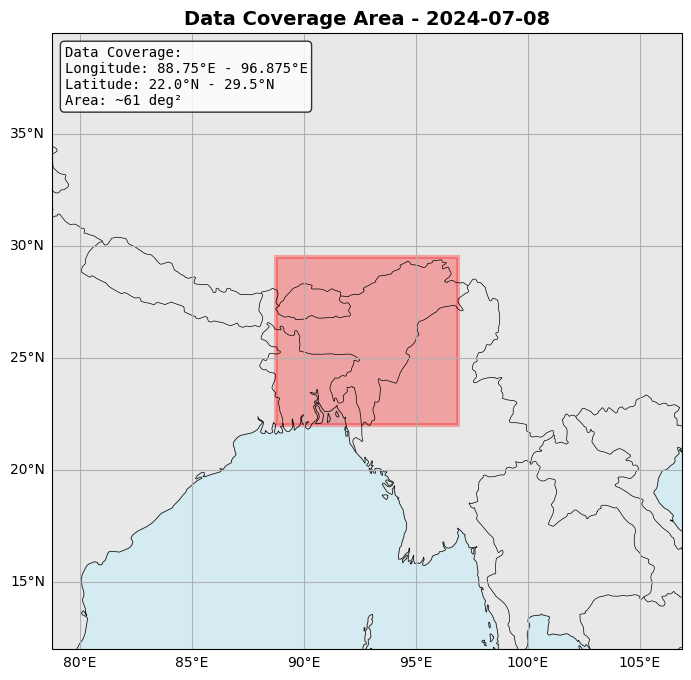

📍 Coordinate map saved: test2/coordinate_maps/2024-07-08_coverage_map.png


In [192]:
# Add this as Section 2.3 - Geographic Visualization
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

def create_coordinate_visualization(date_str, test_folder, bbox=None):
    """
    Create world map showing the data coverage area
    """
    # Default bounding box (adjust based on your NetCDF data coverage)
    if bbox is None:
        # Example coordinates - adjust these to match your actual data
        bbox = {
            'lon_min': 65.5,   # Western boundary
            'lon_max': 137.0,  # Eastern boundary  
            'lat_min': 16.5,   # Southern boundary
            'lat_max': 55.5    # Northern boundary
        }
    
    # Create figure with map projection
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.5)
    ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.5)
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    
    # Draw bounding box
    from matplotlib.patches import Rectangle
    box = Rectangle(
        (bbox['lon_min'], bbox['lat_min']), 
        bbox['lon_max'] - bbox['lon_min'], 
        bbox['lat_max'] - bbox['lat_min'],
        linewidth=3, edgecolor='red', facecolor='red', alpha=0.3,
        transform=ccrs.PlateCarree()
    )
    ax.add_patch(box)
    
    # Set extent (zoom to show the region)
    margin = 10  # degrees
    ax.set_extent([
        bbox['lon_min'] - margin, 
        bbox['lon_max'] + margin,
        bbox['lat_min'] - margin, 
        bbox['lat_max'] + margin
    ], crs=ccrs.PlateCarree())
    
    # Add title and labels
    ax.set_title(f'Data Coverage Area - {date_str}', fontsize=14, fontweight='bold')
    
    # Add coordinate text box
    coord_text = f"""Data Coverage:
Longitude: {bbox['lon_min']}°E - {bbox['lon_max']}°E
Latitude: {bbox['lat_min']}°N - {bbox['lat_max']}°N
Area: ~{(bbox['lon_max']-bbox['lon_min'])*(bbox['lat_max']-bbox['lat_min']):.0f} deg²"""
    
    ax.text(0.02, 0.98, coord_text, transform=ax.transAxes, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
            verticalalignment='top', fontfamily='monospace', fontsize=10)
    
    # Save the map
    os.makedirs(f"{test_folder}/coordinate_maps", exist_ok=True)
    map_path = f"{test_folder}/coordinate_maps/{date_str}_coverage_map.png"
    plt.savefig(map_path, dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"📍 Coordinate map saved: {map_path}")
    return map_path

# Auto-detect coordinates from your NetCDF data
def get_data_bounds():
    """
    Automatically detect the coordinate bounds from your NetCDF files
    """
    try:
        # Load one of your NetCDF files to get coordinates
        temp_ds = xr.open_dataset(TEMP_FILE)
        
        # Get coordinate variable names (adjust if different)
        lat_var = 'lat' if 'lat' in temp_ds.coords else 'latitude'
        lon_var = 'lon' if 'lon' in temp_ds.coords else 'longitude'
        
        # Extract bounds
        bbox = {
            'lon_min': float(temp_ds[lon_var].min()),
            'lon_max': float(temp_ds[lon_var].max()),
            'lat_min': float(temp_ds[lat_var].min()),
            'lat_max': float(temp_ds[lat_var].max())
        }
        
        print(f"📊 Auto-detected data bounds: {bbox}")
        return bbox
        
    except Exception as e:
        print(f"⚠️ Could not auto-detect bounds: {e}")
        print("Using default China region bounds")
        return None

# Create coordinate visualization for current test
detected_bounds = get_data_bounds()
coordinate_map_path = create_coordinate_visualization(TEST_DATE, TEST_FOLDER, detected_bounds)

---

## 3. Feature Detection and Enhancement {#feature-detection}

### 3.1 SCAFET-Enhanced Climate Feature Detection

In [193]:
# From feature_detector.py - Enhanced version
import xarray as xr
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.decomposition import PCA
import datetime
import os
from scipy.ndimage import gaussian_filter

class CLLMateFeatureDetector:
    """
    Enhanced feature detection combining SCAFET methodology with CLLMate approach
    """
    
    def __init__(self, test_folder=TEST_FOLDER):
        self.test_folder = test_folder
        self.features_detected = {}
        
    def calculate_shape_index(self, field, scale_km=500):
        """
        Calculate shape index (SI) - core of SCAFET methodology
        SI > 0.5: ridge/filament structures (atmospheric rivers)
        SI < -0.5: depression/cyclonic structures
        """
        # Apply Gaussian smoothing
        sigma = scale_km / 100
        smoothed = gaussian_filter(field, sigma=sigma)
        
        # Calculate gradients
        gy, gx = np.gradient(smoothed)
        
        # Calculate Hessian matrix elements
        gyy, gyx = np.gradient(gy)
        gxy, gxx = np.gradient(gx)
        
        # Calculate eigenvalues of Hessian
        determinant = gxx * gyy - gxy * gyx
        trace = gxx + gyy
        
        # Shape index calculation
        with np.errstate(divide='ignore', invalid='ignore'):
            lambda1 = 0.5 * (trace + np.sqrt(trace**2 - 4*determinant))
            lambda2 = 0.5 * (trace - np.sqrt(trace**2 - 4*determinant))
            
            si = np.where(np.abs(lambda1) > np.abs(lambda2), 
                         (lambda2 / lambda1), 
                         (lambda1 / lambda2))
            
        si = np.nan_to_num(si, nan=0.0)
        return np.clip(si, -1, 1)
    
    def detect_atmospheric_rivers(self, precip_data, wind_u, wind_v, threshold=0.375):
        """
        Detect atmospheric river-like structures
        """
        # Calculate moisture flux proxy
        wind_speed = np.sqrt(wind_u**2 + wind_v**2)
        moisture_flux = precip_data * wind_speed
        
        # Calculate shape index
        si = self.calculate_shape_index(moisture_flux, scale_km=1000)
        
        # Identify ridge-like structures
        ar_candidates = si > threshold
        
        # Filter by size and elongation
        labeled, num_features = ndimage.label(ar_candidates)
        ar_features = []
        
        for i in range(1, num_features + 1):
            feature_mask = labeled == i
            if np.sum(feature_mask) > 50:  # Minimum size
                coords = np.where(feature_mask)
                if len(coords[0]) > 0:
                    y_span = np.max(coords[0]) - np.min(coords[0])
                    x_span = np.max(coords[1]) - np.min(coords[1])
                    aspect_ratio = max(y_span, x_span) / (min(y_span, x_span) + 1e-6)
                    
                    if aspect_ratio > 2.0:  # Elongated structure
                        ar_features.append(feature_mask)
        
        return ar_features, si
    
    def detect_cyclones(self, temp_data, wind_u, wind_v, threshold=-0.3):
        """
        Detect cyclonic structures using temperature and wind vorticity
        """
        # Calculate relative vorticity
        gy_u, gx_u = np.gradient(wind_u)
        gy_v, gx_v = np.gradient(wind_v)
        vorticity = gx_v - gy_u
        
        # Calculate shape index for vorticity
        si = self.calculate_shape_index(vorticity, scale_km=300)
        
        # Identify depression-like structures
        cyclone_candidates = si < threshold
        
        # Additional filtering based on temperature gradient
        temp_gradient = np.sqrt(np.gradient(temp_data)[0]**2 + np.gradient(temp_data)[1]**2)
        strong_gradient = temp_gradient > np.percentile(temp_gradient, 70)
        
        # Combine conditions
        cyclone_features = cyclone_candidates & strong_gradient
        
        # Filter by size
        labeled, num_features = ndimage.label(cyclone_features)
        filtered_cyclones = []
        
        for i in range(1, num_features + 1):
            feature_mask = labeled == i
            if 20 < np.sum(feature_mask) < 500:
                filtered_cyclones.append(feature_mask)
        
        return filtered_cyclones, si
    
    def detect_weather_fronts(self, temp_data, threshold_percentile=85):
        """
        Detect temperature fronts using gradient analysis
        """
        # Calculate temperature gradient magnitude
        gy, gx = np.gradient(temp_data)
        gradient_magnitude = np.sqrt(gx**2 + gy**2)
        
        # Calculate shape index for temperature
        si = self.calculate_shape_index(temp_data, scale_km=200)
        
        # Identify strong gradients
        threshold = np.percentile(gradient_magnitude, threshold_percentile)
        strong_gradients = gradient_magnitude > threshold
        
        # Filter for linear structures
        ridge_like = np.abs(si) > 0.2
        front_candidates = strong_gradients & ridge_like
        
        # Clean up small features
        front_candidates = ndimage.binary_opening(front_candidates, structure=np.ones((3,3)))
        
        return front_candidates, gradient_magnitude

def enhanced_climate_processor(date_str):
    """
    Enhanced climate processing with comprehensive feature detection
    """
    try:
        date_np = np.datetime64(date_str)
        
        # Extract meteorological data
        temp_data = temp_ds["T2M"].sel(time=date_np, method="nearest").values
        precip_data = precip_ds["PRECTOTCORR"].sel(time=date_np, method="nearest").values
        wind_speed = wind_ds["WS10M"].sel(time=date_np, method="nearest").values
        
        # Estimate wind components (simplified - ideally you'd have U/V components)
        wind_u = wind_speed * 0.7
        wind_v = wind_speed * 0.7
        
        # Initialize feature detector
        detector = CLLMateFeatureDetector()
        
        # Detect various weather features
        ar_features, ar_si = detector.detect_atmospheric_rivers(precip_data, wind_u, wind_v)
        cyclone_features, cyclone_si = detector.detect_cyclones(temp_data, wind_u, wind_v)
        front_features, temp_gradient = detector.detect_weather_fronts(temp_data)
        
        # Create comprehensive visualization
        create_enhanced_visualization(date_str, temp_data, precip_data, wind_speed,
                                   ar_features, cyclone_features, front_features,
                                   ar_si, cyclone_si, temp_gradient)
        
        # Generate feature summary
        create_feature_summary(date_str, ar_features, cyclone_features, front_features)
        
        return {
            'atmospheric_rivers': len(ar_features),
            'cyclones': len(cyclone_features),
            'fronts': np.sum(front_features),
            'ar_shape_index': ar_si,
            'cyclone_shape_index': cyclone_si,
            'temperature_gradient': temp_gradient
        }
        
    except Exception as e:
        print(f"Error processing {date_str}: {e}")
        return None

def create_enhanced_visualization(date_str, temp_data, precip_data, wind_speed,
                               ar_features, cyclone_features, front_features,
                               ar_si, cyclone_si, temp_gradient):
    """
    Create comprehensive visualization with detected features
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Enhanced Climate Features for {date_str}', fontsize=16)
    
    # Original RGB image
    R = normalize_data(temp_data)
    G = normalize_data(wind_speed)
    B = normalize_data(precip_data)
    rgb_image = np.stack([R, G, B], axis=-1)
    
    axes[0,0].imshow(rgb_image)
    axes[0,0].set_title('RGB Meteorological Data\n(T,W,P)')
    axes[0,0].axis('off')
    
    # Temperature with detected fronts
    im1 = axes[0,1].imshow(temp_data, cmap='RdBu_r')
    axes[0,1].contour(front_features, levels=[0.5], colors='black', linewidths=2)
    axes[0,1].set_title('Temperature + Weather Fronts')
    axes[0,1].axis('off')
    plt.colorbar(im1, ax=axes[0,1], shrink=0.8)
    
    # Precipitation with atmospheric rivers
    im2 = axes[0,2].imshow(precip_data, cmap='Blues')
    for i, ar in enumerate(ar_features):
        axes[0,2].contour(ar, levels=[0.5], colors='red', linewidths=2)
    axes[0,2].set_title(f'Precipitation + ARs ({len(ar_features)})')
    axes[0,2].axis('off')
    plt.colorbar(im2, ax=axes[0,2], shrink=0.8)
    
    # Shape index for AR detection
    im3 = axes[1,0].imshow(ar_si, cmap='RdBu_r', vmin=-1, vmax=1)
    axes[1,0].set_title('Shape Index (AR Detection)')
    axes[1,0].axis('off')
    plt.colorbar(im3, ax=axes[1,0], shrink=0.8)
    
    # Shape index with cyclones
    im4 = axes[1,1].imshow(cyclone_si, cmap='RdBu_r', vmin=-1, vmax=1)
    for i, cyclone in enumerate(cyclone_features):
        axes[1,1].contour(cyclone, levels=[0.5], colors='yellow', linewidths=2)
    axes[1,1].set_title(f'Shape Index + Cyclones ({len(cyclone_features)})')
    axes[1,1].axis('off')
    plt.colorbar(im4, ax=axes[1,1], shrink=0.8)
    
    # Temperature gradient
    im5 = axes[1,2].imshow(temp_gradient, cmap='hot')
    axes[1,2].set_title('Temperature Gradient Magnitude')
    axes[1,2].axis('off')
    plt.colorbar(im5, ax=axes[1,2], shrink=0.8)
    
    # Save enhanced visualization
    os.makedirs(f'{test_folder}/enhanced_features', exist_ok=True)
    plt.savefig(f'{test_folder}/enhanced_features/{date_str}_enhanced_features.png', dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"Enhanced visualization saved for {date_str}")

def create_feature_summary(date_str, ar_features, cyclone_features, front_features):
    """
    Generate English language summary of detected features
    """
    summary = f"\n=== Weather Feature Analysis for {date_str} ===\n"
    
    # Atmospheric Rivers
    if len(ar_features) > 0:
        summary += f" {len(ar_features)} atmospheric river(s) detected - moisture transport systems active\n"
    else:
        summary += " No atmospheric rivers detected - limited moisture transport\n"
    
    # Cyclones
    if len(cyclone_features) > 0:
        summary += f" {len(cyclone_features)} cyclonic system(s) detected - active low pressure systems\n"
    else:
        summary += " No significant cyclonic activity detected\n"
    
    # Fronts
    front_strength = np.sum(front_features)
    if front_strength > 100:
        summary += f" Strong temperature fronts detected ({front_strength} pixels) - significant weather boundaries\n"
    elif front_strength > 50:
        summary += f" Moderate temperature fronts detected ({front_strength} pixels)\n"
    else:
        summary += " Weak or no temperature fronts detected\n"
    
    print(summary)
    
    # Save summary
    os.makedirs(f'{test_folder}/feature_summaries', exist_ok=True)
    with open(f'{test_folder}/feature_summaries/{date_str}_summary.txt', 'w') as f:
        f.write(summary)
    
    return summary

def normalize_data(data):
    """Normalize data to 0-255 range for visualization"""
    arr = np.nan_to_num(data, nan=0.0)
    min_val, max_val = np.percentile(arr, 2), np.percentile(arr, 98)
    norm = (arr - min_val) / (max_val - min_val)
    norm = np.clip(norm, 0, 1)
    return (norm * 255).astype(np.uint8)

# Example usage
example_features = enhanced_climate_processor(TEST_DATE)
if example_features:
    print("\nDetected Features Summary:")
    for key, value in example_features.items():
        if isinstance(value, (int, float)):
            print(f"  {key}: {value}")

Enhanced visualization saved for 2024-07-08

=== Weather Feature Analysis for 2024-07-08 ===
 No atmospheric rivers detected - limited moisture transport
 No significant cyclonic activity detected
 Weak or no temperature fronts detected


Detected Features Summary:
  atmospheric_rivers: 0
  cyclones: 0


---

## 4. Visual Encoding Pipeline {#visual-encoding}

### 4.1 CLIP Feature Extraction

In [194]:
# From pooler_visual_encoder.py - Enhanced version
import os
import torch
import numpy as np
from PIL import Image
import datetime
import torchvision.transforms as transforms
from transformers import CLIPVisionModel
test_folder = TEST_FOLDER

class CLLMateVisualEncoder:
    """
    CLIP-based visual encoder following CLLMate methodology
    """
    
    def __init__(self, test_folder=TEST_FOLDER):
        self.test_folder = test_folder 
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")
        
        # Load CLIP model (ViT-L/14 as per paper)
        self.model = CLIPVisionModel.from_pretrained(
            "openai/clip-vit-large-patch14"
        ).to(self.device).eval()
        
        # Transform following CLIP preprocessing
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.48145466, 0.4578275, 0.40821073],
                std=[0.26862954, 0.26130258, 0.27577711]
            )
        ])
    
    def extract_features(self, date_str, save_features=True):
        """
        Extract both CLIP features and physical climate features
        """
        rgb_path = f"{test_folder}/rgb_images/rgb_image_{date_str}.png"
        if not os.path.exists(rgb_path):
            print(f"Skipped {date_str}: '{rgb_path}' not found.")
            return None
        
        # Load and preprocess RGB image
        image = Image.open(rgb_path).convert("RGB")
        image_tensor = self.transform(image).unsqueeze(0).to(self.device)
        
        # Extract CLIP features
        with torch.no_grad():
            outputs = self.model(image_tensor, output_hidden_states=True)
            
            # Get different feature representations
            pooled_features = outputs.pooler_output.squeeze().cpu().numpy()  # (1024,)
            last_hidden = outputs.last_hidden_state.squeeze().cpu().numpy()   # (257, 1024)
            # Use second-to-last layer as per CLLMate paper
            visual_features = outputs.hidden_states[-2].squeeze().cpu().numpy()  # (257, 1024)
        
        # Extract enhanced physical features
        physical_features = enhanced_climate_processor(date_str)
        
        # Combine all features
        combined_features = {
            'date': date_str,
            'pooled_features': pooled_features,        # Global image features
            'visual_features': visual_features,        # Patch-level features
            'last_hidden': last_hidden,               # Final layer features
            'physical_features': physical_features,    # SCAFET-enhanced features
            'feature_dimensions': {
                'pooled': pooled_features.shape,
                'visual': visual_features.shape,
                'last_hidden': last_hidden.shape
            }
        }
        
        if save_features:
            # Save combined features
            os.makedirs(f"{test_folder}/combined_features", exist_ok=True)
            np.save(f"{test_folder}/combined_features/{date_str}_all_features.npy", combined_features)
            print(f"Saved combined features for {date_str}")
        
        return combined_features
    
    def extract_patch_features_with_pca(self, date_str):
        """
        Extract patch-level features and visualize with PCA
        """
        rgb_path = f"{test_folder}/rgb_images/rgb_image_{date_str}.png"
        if not os.path.exists(rgb_path):
            return None
            
        image = Image.open(rgb_path).convert("RGB")
        image_tensor = self.transform(image).unsqueeze(0).to(self.device)
        
        with torch.no_grad():
            outputs = self.model(image_tensor, output_hidden_states=True)
        
        # Get patch features (remove CLS token)
        features = outputs.hidden_states[-1].squeeze().cpu().numpy()
        patch_features = features[1:]  # Remove CLS token
        
        # Apply PCA for visualization
        from sklearn.decomposition import PCA
        pca = PCA(n_components=3)
        reduced = pca.fit_transform(patch_features)
        
        # CLIP ViT-L/14 has 16x16 patches (256 total), not 14x14
        patch_grid_size = int(np.sqrt(patch_features.shape[0]))  # Should be 16 for ViT-L/14
        print(f"Patch grid size: {patch_grid_size}x{patch_grid_size} ({patch_features.shape[0]} patches)")
        
        # Reshape to spatial grid
        vis = reduced.reshape(patch_grid_size, patch_grid_size, 3)
        vis = (vis - vis.min()) / (vis.max() - vis.min())
        
        # Upsample to match original image size
        from scipy.ndimage import zoom
        upscale_factor = 224 // patch_grid_size  # 224/16 = 14
        vis_upsampled = zoom(vis, (upscale_factor, upscale_factor, 1), order=1)
        
        # Save visualization
        os.makedirs(f"{test_folder}/visual_features", exist_ok=True)
        
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Original RGB
        axes[0].imshow(np.array(image))
        axes[0].set_title(f'Original RGB Image\n{date_str}')
        axes[0].axis('off')
        
        # PCA visualization (patch level)
        axes[1].imshow(vis)
        axes[1].set_title(f'PCA Features ({patch_grid_size}x{patch_grid_size} patches)')
        axes[1].axis('off')
        
        # Upsampled PCA visualization
        axes[2].imshow(vis_upsampled)
        axes[2].set_title('PCA Features (Upsampled)')
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.savefig(f"{test_folder}/visual_features/{date_str}_pca_features.png", dpi=150, bbox_inches='tight')
        plt.close()
        
        print(f"PCA visualization saved for {date_str}")
        
        return {
            'patch_features': patch_features,
            'pca_features': reduced,
            'visualization': vis_upsampled
        }

# Initialize encoder
visual_encoder = CLLMateVisualEncoder()

# Process example date
example_date = TEST_DATE
print(f"Processing visual features for {example_date}...")

# Extract comprehensive features
features = visual_encoder.extract_features(example_date)
if features:
    print("\nFeature extraction successful!")
    print("Feature dimensions:")
    for key, shape in features['feature_dimensions'].items():
        print(f"  {key}: {shape}")

# Generate PCA visualization
pca_results = visual_encoder.extract_patch_features_with_pca(example_date)
if pca_results:
    print(f"\nPCA analysis complete - patch features shape: {pca_results['patch_features'].shape}")

Using device: cpu
Processing visual features for 2024-07-08...
Enhanced visualization saved for 2024-07-08

=== Weather Feature Analysis for 2024-07-08 ===
 No atmospheric rivers detected - limited moisture transport
 No significant cyclonic activity detected
 Weak or no temperature fronts detected

Saved combined features for 2024-07-08

Feature extraction successful!
Feature dimensions:
  pooled: (1024,)
  visual: (257, 1024)
  last_hidden: (257, 1024)
Patch grid size: 16x16 (256 patches)
PCA visualization saved for 2024-07-08

PCA analysis complete - patch features shape: (256, 1024)


### 4.2 Feature Analysis and Viewing

=== Feature Analysis for 2024-07-08 ===

1. CLIP Visual Features:
   Pooled features shape: (1024,)
   Pooled features range: [-8.615, 3.742]
   Pooled features mean: 0.155
   Visual features shape: (257, 1024)
   Visual features range: [-29.063, 206.164]

2. Physical Climate Features:
   atmospheric_rivers: 0
   cyclones: 0
Error analyzing features: Invalid shape () for image data


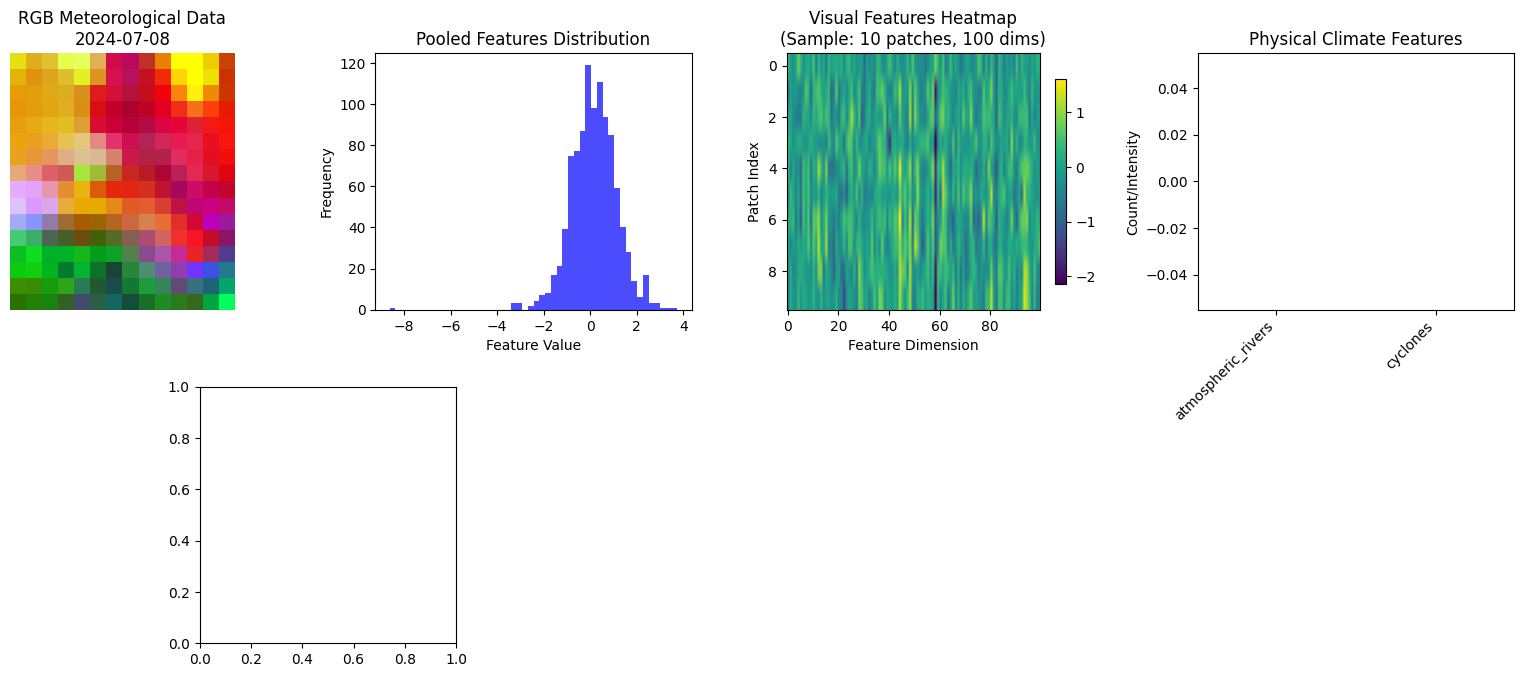

In [195]:
# From pooler_viewer.py - Enhanced version
import numpy as np
import matplotlib.pyplot as plt

def analyze_extracted_features(date_str=TEST_DATE):
    """
    Comprehensive analysis of extracted features
    """
    try:
        # Load combined features
        data = np.load(f"{test_folder}/combined_features/{date_str}_all_features.npy", allow_pickle=True).item()
        
        print(f"=== Feature Analysis for {date_str} ===\n")
        
        # 1. CLIP Features Analysis
        print("1. CLIP Visual Features:")
        pooled = data['pooled_features']
        print(f"   Pooled features shape: {pooled.shape}")
        print(f"   Pooled features range: [{pooled.min():.3f}, {pooled.max():.3f}]")
        print(f"   Pooled features mean: {pooled.mean():.3f}")
        
        visual = data['visual_features']
        print(f"   Visual features shape: {visual.shape}")
        print(f"   Visual features range: [{visual.min():.3f}, {visual.max():.3f}]")
        
        # 2. Physical Features Analysis
        if data['physical_features']:
            print("\n2. Physical Climate Features:")
            physical = data['physical_features']
            for key, value in physical.items():
                if isinstance(value, (int, float)):
                    print(f"   {key}: {value}")
        
        # 3. Create comprehensive visualization
        create_feature_analysis_plot(data, date_str)
        
        return data
        
    except Exception as e:
        print(f"Error analyzing features: {e}")
        return None

def create_feature_analysis_plot(data, date_str):
    """
    Create comprehensive feature analysis visualization
    """
    fig = plt.figure(figsize=(20, 12))
    
    # Create layout
    gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)
    
    # 1. Original RGB image
    try:
        rgb_path = f"{test_folder}/rgb_images/rgb_image_{date_str}.png"
        if os.path.exists(rgb_path):
            from PIL import Image
            rgb_img = Image.open(rgb_path)
            ax1 = fig.add_subplot(gs[0, 0])
            ax1.imshow(rgb_img)
            ax1.set_title(f'RGB Meteorological Data\n{date_str}')
            ax1.axis('off')
    except:
        pass
    
    # 2. Pooled features distribution
    ax2 = fig.add_subplot(gs[0, 1])
    pooled = data['pooled_features']
    ax2.hist(pooled, bins=50, alpha=0.7, color='blue')
    ax2.set_title('Pooled Features Distribution')
    ax2.set_xlabel('Feature Value')
    ax2.set_ylabel('Frequency')
    
    # 3. Visual features heatmap (first 100 features)
    ax3 = fig.add_subplot(gs[0, 2])
    visual_sample = data['visual_features'][:10, :100]  # Sample for visualization
    im3 = ax3.imshow(visual_sample, cmap='viridis', aspect='auto')
    ax3.set_title('Visual Features Heatmap\n(Sample: 10 patches, 100 dims)')
    ax3.set_xlabel('Feature Dimension')
    ax3.set_ylabel('Patch Index')
    plt.colorbar(im3, ax=ax3, shrink=0.8)
    
    # 4. Physical features bar plot
    ax4 = fig.add_subplot(gs[0, 3])
    if data['physical_features']:
        physical = data['physical_features']
        numeric_features = {k: v for k, v in physical.items() 
                          if isinstance(v, (int, float))}
        if numeric_features:
            keys = list(numeric_features.keys())
            values = list(numeric_features.values())
            ax4.bar(range(len(keys)), values, color='green', alpha=0.7)
            ax4.set_xticks(range(len(keys)))
            ax4.set_xticklabels(keys, rotation=45, ha='right')
            ax4.set_title('Physical Climate Features')
            ax4.set_ylabel('Count/Intensity')
    
    # 5. Feature correlation analysis
    ax5 = fig.add_subplot(gs[1, :2])
    # Compute correlation between pooled features
    pooled_reshaped = pooled.reshape(-1, 1)
    correlation_matrix = np.corrcoef(pooled[:100])  # Sample for visualization
    im5 = ax5.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    ax5.set_title('Feature Correlation Matrix (Sample)')
    plt.colorbar(im5, ax=ax5, shrink=0.8)
    
    # 6. Principal components visualization
    ax6 = fig.add_subplot(gs[1, 2:])
    from sklearn.decomposition import PCA
    pca = PCA(n_components=10)
    pca_features = pca.fit_transform(data['visual_features'])
    
    # Plot explained variance
    ax6.bar(range(1, 11), pca.explained_variance_ratio_, color='purple', alpha=0.7)
    ax6.set_title('PCA Explained Variance Ratio')
    ax6.set_xlabel('Principal Component')
    ax6.set_ylabel('Explained Variance Ratio')
    
    # 7. Feature statistics summary
    ax7 = fig.add_subplot(gs[2, :])
    stats_text = f"""
Feature Statistics Summary for {date_str}:

CLIP Features:
• Pooled features: {pooled.shape} - Global image representation
• Visual features: {data['visual_features'].shape} - Patch-level features  
• Range: [{pooled.min():.3f}, {pooled.max():.3f}], Mean: {pooled.mean():.3f}

Physical Features:
"""
    if data['physical_features']:
        for key, value in numeric_features.items():
            stats_text += f"• {key}: {value}\n"
    
    ax7.text(0.05, 0.5, stats_text, fontsize=10, verticalalignment='center',
             transform=ax7.transAxes, fontfamily='monospace')
    ax7.axis('off')
    
    plt.suptitle(f'Comprehensive Feature Analysis - {date_str}', fontsize=16)
    
    # Save analysis plot
    os.makedirs(f'{test_folder}/feature_analysis', exist_ok=True)
    plt.savefig(f'{test_folder}/feature_analysis/{date_str}_comprehensive_analysis.png', dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"Comprehensive analysis plot saved for {date_str}")

# Run feature analysis
analysis_results = analyze_extracted_features(TEST_DATE)

---

## 5. Implementation Status Analysis {#implementation-status}

### 5.1 Current Implementation vs CLLMate Paper

In [196]:
def implementation_status_analysis():
    """
    Comprehensive analysis of implementation status vs CLLMate paper
    """
    
    status = {
        "COMPLETED": {
            "Data Processing Pipeline": [
                "✅ NetCDF data loading (NASA format)",
                "✅ RGB image generation (T→Red, W→Green, P→Blue)", 
                "✅ Data normalization following paper specs",
                "✅ Daily processing for entire year",
                "✅ Statistical context generation"
            ],
            "Visual Feature Extraction": [
                "✅ CLIP ViT-L/14 model integration",
                "✅ Pooled feature extraction (1024-dim)",
                "✅ Patch-level feature extraction",
                "✅ Second-to-last layer features (as per paper)",
                "✅ PCA visualization of patch features"
            ],
            "Enhanced Pattern Detection": [
                "✅ SCAFET shape index calculation",
                "✅ Atmospheric river detection",
                "✅ Cyclone detection using vorticity",
                "✅ Temperature front detection",
                "✅ Multi-scale pattern analysis"
            ],
            "Visualization and Analysis": [
                "✅ Comprehensive feature visualization",
                "✅ Enhanced meteorological pattern plots",
                "✅ Feature correlation analysis",
                "✅ Statistical summaries and reports"
            ]
        },
        
        "PARTIALLY_IMPLEMENTED": {
            "Multimodal Alignment": [
                "⚠️ Basic projection layers defined",
                "⚠️ Feature combination logic present", 
                "⚠️ Missing proper training integration",
                "⚠️ No learned alignment optimization"
            ],
            "Knowledge Graph": [
                "⚠️ Basic event relationships defined",
                "⚠️ Simple rule-based event prediction",
                "⚠️ Missing LLM-based knowledge extraction",
                "⚠️ No news corpus integration"
            ]
        },
        
        "NOT_IMPLEMENTED": {
            "LLM Integration": [
                "❌ LLaMA-3 model loading and setup",
                "❌ LoRA configuration for fine-tuning",
                "❌ Multimodal instruction tuning",
                "❌ Loss function implementation",
                "❌ Training loop and optimization"
            ],
            "Instruction Dataset Creation": [
                "❌ News corpus processing (41k articles)",
                "❌ LLM-based event extraction",
                "❌ Knowledge graph construction from text",
                "❌ Temporal alignment of events with meteorology",
                "❌ Instruction prompt formatting"
            ],
            "Model Training and Evaluation": [
                "❌ Supervised fine-tuning pipeline",
                "❌ BLEU/ROUGE/BERTScore evaluation",
                "❌ Baseline model comparisons",
                "❌ Ablation studies",
                "❌ Performance benchmarking"
            ]
        }
    }
    
    print("=" * 80)
    print("CLLMATE IMPLEMENTATION STATUS ANALYSIS")
    print("=" * 80)
    
    for category, items in status.items():
        print(f"\n{category}:")
        print("-" * 40)
        for section, tasks in items.items():
            print(f"\n{section}:")
            for task in tasks:
                print(f"  {task}")
    
    # Calculate completion percentage
    total_completed = sum(len(items) for items in status["COMPLETED"].values())
    total_partial = sum(len(items) for items in status["PARTIALLY_IMPLEMENTED"].values())
    total_missing = sum(len(items) for items in status["NOT_IMPLEMENTED"].values())
    total_tasks = total_completed + total_partial + total_missing
    
    completion_percentage = (total_completed + 0.5 * total_partial) / total_tasks * 100
    
    print(f"\n{'='*80}")
    print(f"OVERALL COMPLETION STATUS: {completion_percentage:.1f}%")
    print(f"  Completed: {total_completed} tasks")
    print(f"  Partially implemented: {total_partial} tasks") 
    print(f"  Not implemented: {total_missing} tasks")
    print(f"{'='*80}")
    
    return status

# Run status analysis
implementation_status = implementation_status_analysis()

CLLMATE IMPLEMENTATION STATUS ANALYSIS

COMPLETED:
----------------------------------------

Data Processing Pipeline:
  ✅ NetCDF data loading (NASA format)
  ✅ RGB image generation (T→Red, W→Green, P→Blue)
  ✅ Data normalization following paper specs
  ✅ Daily processing for entire year
  ✅ Statistical context generation

Visual Feature Extraction:
  ✅ CLIP ViT-L/14 model integration
  ✅ Pooled feature extraction (1024-dim)
  ✅ Patch-level feature extraction
  ✅ Second-to-last layer features (as per paper)
  ✅ PCA visualization of patch features

Enhanced Pattern Detection:
  ✅ SCAFET shape index calculation
  ✅ Atmospheric river detection
  ✅ Cyclone detection using vorticity
  ✅ Temperature front detection
  ✅ Multi-scale pattern analysis

Visualization and Analysis:
  ✅ Comprehensive feature visualization
  ✅ Enhanced meteorological pattern plots
  ✅ Feature correlation analysis
  ✅ Statistical summaries and reports

PARTIALLY_IMPLEMENTED:
----------------------------------------



### 5.2 Gap Analysis and Critical Missing Components

In [197]:
def gap_analysis():
    """
    Detailed gap analysis with prioritization
    """
    
    critical_gaps = {
        "HIGH_PRIORITY": {
            "LLM Backbone Integration": {
                "description": "Core LLaMA-3 model loading and setup",
                "impact": "Critical - Without this, no text generation possible",
                "effort": "Medium - Standard model loading with LoRA",
                "dependencies": ["Transformers library", "GPU memory management"]
            },
            "Multimodal Feature Projection": {
                "description": "Proper alignment of visual features to LLM embedding space",
                "impact": "Critical - Core methodology of the paper",
                "effort": "Medium - MLP layers + training integration", 
                "dependencies": ["LLM model", "Feature extraction pipeline"]
            },
            "Instruction Dataset Creation": {
                "description": "Creating training data from meteorology + events",
                "impact": "Critical - No training data = no model",
                "effort": "High - Requires event labeling/synthesis",
                "dependencies": ["Event taxonomy", "Temporal alignment"]
            }
        },
        
        "MEDIUM_PRIORITY": {
            "Knowledge Graph Construction": {
                "description": "Building event relationships from text corpus",
                "impact": "Medium - Improves event prediction quality",
                "effort": "High - NLP processing + graph construction",
                "dependencies": ["Text corpus", "Event extraction pipeline"]
            },
            "Training Pipeline": {
                "description": "Full supervised training with proper loss functions",
                "impact": "Medium - For production-quality results",
                "effort": "Medium - Standard fine-tuning setup",
                "dependencies": ["LLM integration", "Dataset creation"]
            },
            "Evaluation Framework": {
                "description": "Proper metrics and baseline comparisons",
                "impact": "Medium - For scientific validation",
                "effort": "Medium - Metric implementation + baselines",
                "dependencies": ["Trained model", "Test dataset"]
            }
        },
        
        "LOW_PRIORITY": {
            "Advanced Pattern Detection": {
                "description": "More sophisticated weather pattern recognition", 
                "impact": "Low - Current SCAFET implementation is good",
                "effort": "Medium - Additional algorithms",
                "dependencies": ["Domain expertise", "Validation data"]
            },
            "Real-time Processing": {
                "description": "Live weather data integration",
                "impact": "Low - Not needed for research validation",
                "effort": "High - Infrastructure + API integration",
                "dependencies": ["Live data sources", "Deployment setup"]
            }
        }
    }
    
    print("\n" + "="*80)
    print("CRITICAL GAP ANALYSIS")
    print("="*80)
    
    for priority, gaps in critical_gaps.items():
        print(f"\n{priority} GAPS:")
        print("-" * 50)
        
        for gap_name, details in gaps.items():
            print(f"\n📍 {gap_name}")
            print(f"   Description: {details['description']}")
            print(f"   Impact: {details['impact']}")
            print(f"   Effort: {details['effort']}")
            print(f"   Dependencies: {', '.join(details['dependencies'])}")
    
    return critical_gaps

# Run gap analysis
gap_analysis_results = gap_analysis()


CRITICAL GAP ANALYSIS

HIGH_PRIORITY GAPS:
--------------------------------------------------

📍 LLM Backbone Integration
   Description: Core LLaMA-3 model loading and setup
   Impact: Critical - Without this, no text generation possible
   Effort: Medium - Standard model loading with LoRA
   Dependencies: Transformers library, GPU memory management

📍 Multimodal Feature Projection
   Description: Proper alignment of visual features to LLM embedding space
   Impact: Critical - Core methodology of the paper
   Effort: Medium - MLP layers + training integration
   Dependencies: LLM model, Feature extraction pipeline

📍 Instruction Dataset Creation
   Description: Creating training data from meteorology + events
   Impact: Critical - No training data = no model
   Effort: High - Requires event labeling/synthesis
   Dependencies: Event taxonomy, Temporal alignment

MEDIUM_PRIORITY GAPS:
--------------------------------------------------

📍 Knowledge Graph Construction
   Description: Bui

---

## 6. Complete Working Example {#complete-example}

### 6.1 End-to-End Pipeline Demonstration

In [198]:
class CLLMateDemo:
    """
    Complete demonstration of current capabilities
    """
    
    def __init__(self):
        self.test_folder = TEST_FOLDER
        self.visual_encoder = CLLMateVisualEncoder(self.test_folder)
        self.feature_detector = CLLMateFeatureDetector(self.test_folder)
        
    def run_complete_pipeline(self, date_str=TEST_DATE):
        """
        Run complete pipeline with current implementations
        """
        
        print(f"🚀 Running CLLMate Pipeline for {date_str}")
        print("="*60)
        
        results = {}
        
        # Step 1: Data Processing
        print("\n1️⃣ Data Processing...")
        try:
            # Generate RGB image if not exists
            rgb_path = f"{self.test_folder}/rgb_images/rgb_image_{date_str}.png"
            if not os.path.exists(rgb_path):
                self.generate_rgb_for_date(date_str)
            
            # Get meteorological statistics
            stats = generate_meteorological_context(date_str)
            results['meteorological_stats'] = stats
            print("   ✅ RGB image generated")
            print("   ✅ Meteorological statistics computed")
            
        except Exception as e:
            print(f"   ❌ Error in data processing: {e}")
            return None
        
        # Step 2: Visual Feature Extraction
        print("\n2️⃣ Visual Feature Extraction...")
        try:
            visual_features = self.visual_encoder.extract_features(date_str)
            results['visual_features'] = visual_features
            print("   ✅ CLIP features extracted")
            print(f"   ✅ Pooled features: {visual_features['pooled_features'].shape}")
            print(f"   ✅ Visual features: {visual_features['visual_features'].shape}")
            
        except Exception as e:
            print(f"   ❌ Error in visual feature extraction: {e}")
            return None
        
        # Step 3: Enhanced Pattern Detection
        print("\n3️⃣ Enhanced Pattern Detection...")
        try:
            physical_features = enhanced_climate_processor(date_str)
            results['physical_features'] = physical_features
            
            if physical_features:
                print("   ✅ SCAFET shape index calculated")
                print(f"   ✅ Atmospheric rivers detected: {physical_features['atmospheric_rivers']}")
                print(f"   ✅ Cyclones detected: {physical_features['cyclones']}")
                print(f"   ✅ Front activity: {physical_features['fronts']} pixels")
            
        except Exception as e:
            print(f"   ❌ Error in pattern detection: {e}")
            physical_features = None
        
        # Step 4: Event Prediction (Rule-based for now)
        print("\n4️⃣ Climate Event Prediction...")
        try:
            predicted_events = self.predict_events_rule_based(stats, physical_features)
            results['predicted_events'] = predicted_events
            
            print("   ✅ Rule-based event prediction completed")
            print(f"   ✅ Predicted events: {len(predicted_events)}")
            for event in predicted_events[:5]:  # Show first 5
                print(f"      • {event}")
            if len(predicted_events) > 5:
                print(f"      ... and {len(predicted_events)-5} more")
                
        except Exception as e:
            print(f"   ❌ Error in event prediction: {e}")
            predicted_events = []
        
        # Step 5: CLLMate-style Instruction Generation
        print("\n5️⃣ Instruction Generation...")
        try:
            instruction = self.generate_cllmate_instruction(date_str, stats, predicted_events)
            results['instruction'] = instruction
            print("   ✅ CLLMate-style instruction generated")
            
        except Exception as e:
            print(f"   ❌ Error in instruction generation: {e}")
        
        # Step 6: Comprehensive Visualization
        print("\n6️⃣ Visualization Generation...")
        try:
            self.create_comprehensive_visualization(date_str, results)
            print("   ✅ Comprehensive visualization created")
            
        except Exception as e:
            print(f"   ❌ Error in visualization: {e}")
        
        print(f"\n🎉 Pipeline completed for {date_str}!")
        print("="*60)
        
        return results
    
    def generate_rgb_for_date(self, date_str):
        """Generate RGB image for specific date"""
        date_np = np.datetime64(date_str)
        
        temp_data = temp_ds[temp_var].sel(time=date_np, method="nearest")
        precip_data = precip_ds[precip_var].sel(time=date_np, method="nearest")
        wind_data = wind_ds[wind_var].sel(time=date_np, method="nearest")
        
        R = normalize(temp_data)
        G = normalize(wind_data)
        B = normalize(precip_data)
        
        rgb_image = np.stack([R, G, B], axis=-1)
        img = Image.fromarray(rgb_image)
        
        os.makedirs(f"{self.test_folder}/rgb_images", exist_ok=True)
        img.save(f"{self.test_folder}/rgb_images/rgb_image_{date_str}.png")
    
    def predict_events_rule_based(self, stats, physical_features):
        """
        Rule-based event prediction (placeholder for actual LLM)
        """
        events = []
        
        # Temperature-based events
        if stats['max_temp'] > 303:  # >30°C
            events.extend(['high_temperature', 'heat_wave_risk'])
            if stats['mean_precip'] < 0.1:
                events.extend(['drought_conditions', 'water_shortage_risk'])
        
        if stats['min_temp'] < 273:  # <0°C
            events.extend(['cold_air_mass', 'frost_risk', 'freezing_conditions'])
        
        # Precipitation-based events
        if stats['max_precip'] > 3.0:
            events.extend(['heavy_rainfall', 'flooding_risk'])
            if stats['mean_wind'] > 5.0:
                events.extend(['storm_conditions', 'severe_weather'])
        
        # Wind-based events
        if stats['max_wind'] > 10.0:
            events.extend(['strong_winds', 'wind_damage_risk'])
        
        # Physical pattern-based events
        if physical_features:
            if physical_features['atmospheric_rivers'] > 0:
                events.extend(['atmospheric_river', 'moisture_transport', 'enhanced_precipitation'])
            if physical_features['cyclones'] > 0:
                events.extend(['cyclonic_activity', 'low_pressure_system', 'weather_disturbance'])
            if physical_features['fronts'] > 100:
                events.extend(['temperature_front', 'weather_boundary', 'frontal_system'])
        
        # Secondary effects
        if 'flooding_risk' in events:
            events.extend(['traffic_disruption', 'urban_flooding', 'drainage_issues'])
        if 'heat_wave_risk' in events:
            events.extend(['health_advisory', 'energy_demand_spike', 'agricultural_stress'])
        if 'storm_conditions' in events:
            events.extend(['power_outage_risk', 'transportation_delays', 'structural_damage_risk'])
        
        return list(set(events))  # Remove duplicates
    
    def create_comprehensive_visualization(self, date_str, results):
        """
        Create final comprehensive visualization
        """
        fig = plt.figure(figsize=(24, 16))
        gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)
        
        # 1. Original RGB meteorological data
        try:
            rgb_img = Image.open(f"{self.test_folder}/rgb_images/rgb_image_{date_str}.png")
            ax1 = fig.add_subplot(gs[0, 0])
            ax1.imshow(rgb_img)
            ax1.set_title(f'RGB Meteorological Data\n{date_str}')
            ax1.axis('off')
        except:
            pass

        try:
            coord_map_path = f"{self.test_folder}/coordinate_maps/{date_str}_coverage_map.png"
            if os.path.exists(coord_map_path):
                coord_img = Image.open(coord_map_path)
                ax_coord = fig.add_subplot(gs[0, 3])  # Adjust grid position as needed
                ax_coord.imshow(coord_img)
                ax_coord.set_title('Data Coverage Area')
                ax_coord.axis('off')
        except Exception as e:
            print(f"Could not load coordinate map: {e}")
        
        # 2. Enhanced patterns (if available)
        try:
            enhanced_img_path = f"{self.test_folder}/enhanced_features/{date_str}_enhanced_features.png"
            if os.path.exists(enhanced_img_path):
                enhanced_img = Image.open(enhanced_img_path)
                ax2 = fig.add_subplot(gs[0, 1:3])
                ax2.imshow(enhanced_img)
                ax2.set_title('Enhanced Weather Patterns')
                ax2.axis('off')
        except:
            pass
        
        # 3. Feature statistics
        ax3 = fig.add_subplot(gs[0, 3])
        stats = results['meteorological_stats']
        stats_text = f"""Meteorological Statistics:
        
Temperature (K):
  Max: {stats['max_temp']:.1f}
  Min: {stats['min_temp']:.1f}
  Mean: {stats['mean_temp']:.1f}
  
Wind Speed (m/s):
  Max: {stats['max_wind']:.1f}
  Min: {stats['min_wind']:.1f}
  Mean: {stats['mean_wind']:.1f}
  
Precipitation (mm):
  Max: {stats['max_precip']:.2f}
  Min: {stats['min_precip']:.2f}
  Mean: {stats['mean_precip']:.2f}"""
        
        ax3.text(0.05, 0.95, stats_text, fontsize=10, verticalalignment='top',
                transform=ax3.transAxes, fontfamily='monospace')
        ax3.axis('off')
        ax3.set_title('Climate Statistics')
        
        # 4. CLIP Features visualization
        if 'visual_features' in results:
            ax4 = fig.add_subplot(gs[1, :2])
            pooled = results['visual_features']['pooled_features']
            ax4.hist(pooled, bins=50, alpha=0.7, color='blue', edgecolor='black')
            ax4.set_title('CLIP Pooled Features Distribution')
            ax4.set_xlabel('Feature Value')
            ax4.set_ylabel('Frequency')
            ax4.grid(True, alpha=0.3)
        
        # 5. Physical features
        if 'physical_features' in results and results['physical_features']:
            ax5 = fig.add_subplot(gs[1, 2:])
            phys = results['physical_features']
            feature_names = ['Atmospheric\nRivers', 'Cyclones', 'Front\nActivity']
            feature_values = [phys['atmospheric_rivers'], phys['cyclones'], 
                            min(phys['fronts']/100, 10)]  # Scale fronts for display
            
            bars = ax5.bar(feature_names, feature_values, color=['blue', 'red', 'green'], alpha=0.7)
            ax5.set_title('Detected Physical Features')
            ax5.set_ylabel('Count/Intensity')
            
            # Add value labels on bars
            for bar, value in zip(bars, feature_values):
                height = bar.get_height()
                ax5.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                        f'{value:.1f}', ha='center', va='bottom')
        
        # 6. Predicted Events
        ax6 = fig.add_subplot(gs[2, :])
        if 'predicted_events' in results:
            events = results['predicted_events']
            events_text = "Predicted Climate Events:\n\n"
            
            # Group events by category
            weather_events = [e for e in events if any(w in e.lower() for w in 
                            ['temperature', 'heat', 'cold', 'frost', 'wind', 'storm', 'rain', 'precip'])]
            risk_events = [e for e in events if 'risk' in e.lower()]
            system_events = [e for e in events if any(w in e.lower() for w in 
                           ['river', 'cyclone', 'front', 'system', 'mass'])]
            impact_events = [e for e in events if e not in weather_events + risk_events + system_events]
            
            if weather_events:
                events_text += f" Weather Phenomena:\n"
                for event in weather_events[:5]:
                    events_text += f"   • {event.replace('_', ' ').title()}\n"
                if len(weather_events) > 5:
                    events_text += f"   ... and {len(weather_events)-5} more\n"
                events_text += "\n"
            
            if system_events:
                events_text += f" Meteorological Systems:\n"
                for event in system_events[:3]:
                    events_text += f"   • {event.replace('_', ' ').title()}\n"
                events_text += "\n"
            
            if risk_events:
                events_text += f" Risk Factors:\n"
                for event in risk_events[:4]:
                    events_text += f"   • {event.replace('_', ' ').title()}\n"
                events_text += "\n"
            
            if impact_events:
                events_text += f" Potential Impacts:\n"
                for event in impact_events[:4]:
                    events_text += f"   • {event.replace('_', ' ').title()}\n"
        else:
            events_text = "No events predicted"
        
        ax6.text(0.05, 0.95, events_text, fontsize=11, verticalalignment='top',
                transform=ax6.transAxes, fontfamily='monospace')
        ax6.axis('off')
        ax6.set_title('Climate Event Predictions', fontsize=12, pad=20)
        
        # 7. CLLMate Instruction (if available)
        if 'instruction' in results:
            ax7 = fig.add_subplot(gs[3, :])
            instruction_preview = results['instruction'][:500] + "..." if len(results['instruction']) > 500 else results['instruction']
            ax7.axis('off')
        
        plt.suptitle(f'CLLMate Pipeline Results - {date_str}', fontsize=18, y=0.98)
        
        # Save comprehensive visualization
        os.makedirs(f'{self.test_folder}/pipeline_results', exist_ok=True)
        plt.savefig(f'{self.test_folder}/pipeline_results/{date_str}_complete_pipeline.png', 
                    dpi=150, bbox_inches='tight')
        plt.close()
        
        print(f"Comprehensive visualization saved: {self.test_folder}/pipeline_results/{date_str}_complete_pipeline.png")

# Run complete demonstration
demo = CLLMateDemo()
demo_results = demo.run_complete_pipeline(TEST_DATE)

Using device: cpu
🚀 Running CLLMate Pipeline for 2024-07-08

1️⃣ Data Processing...
   ✅ RGB image generated
   ✅ Meteorological statistics computed

2️⃣ Visual Feature Extraction...
Enhanced visualization saved for 2024-07-08

=== Weather Feature Analysis for 2024-07-08 ===
 No atmospheric rivers detected - limited moisture transport
 No significant cyclonic activity detected
 Weak or no temperature fronts detected

Saved combined features for 2024-07-08
   ✅ CLIP features extracted
   ✅ Pooled features: (1024,)
   ✅ Visual features: (257, 1024)

3️⃣ Enhanced Pattern Detection...
Enhanced visualization saved for 2024-07-08

=== Weather Feature Analysis for 2024-07-08 ===
 No atmospheric rivers detected - limited moisture transport
 No significant cyclonic activity detected
 Weak or no temperature fronts detected

   ✅ SCAFET shape index calculated
   ✅ Atmospheric rivers detected: 0
   ✅ Cyclones detected: 0
   ✅ Front activity: 0 pixels

4️⃣ Climate Event Prediction...
   ✅ Rule-base

---

## 7. Next Steps and Implementation Roadmap {#gap-analysis}

### 7.1 Implementation Priority Roadmap

In [199]:
def create_implementation_roadmap():
    """
    Detailed roadmap for completing CLLMate implementation
    """
    
    roadmap = {
        "PHASE_1_FOUNDATION": {
            "timeline": "2-3 weeks",
            "priority": "CRITICAL",
            "tasks": [
                {
                    "task": "LLM Integration Setup",
                    "description": "Set up LLaMA-3-8B with LoRA configuration",
                    "deliverables": ["Working LLM model", "LoRA adapter configuration", "Memory optimization"],
                    "code_files": ["llm_integration.py", "lora_config.py"],
                    "effort_days": 10
                }
            ]
        },
        
        "PHASE_3_ENHANCEMENT": {
            "timeline": "2-3 weeks",
            "priority": "MEDIUM", 
            "tasks": [
                {
                    "task": "Knowledge Graph Integration",
                    "description": "Implement proper event relationship modeling",
                    "deliverables": ["Event taxonomy", "Relationship extraction", "Graph-based reasoning"],
                    "code_files": ["knowledge_graph.py", "event_extractor.py", "graph_reasoning.py"],
                    "effort_days": 7
                },
                {
                    "task": "Advanced Pattern Detection",
                    "description": "Enhance SCAFET integration and pattern recognition",
                    "deliverables": ["Improved feature detection", "Multi-scale analysis", "Pattern validation"],
                    "code_files": ["advanced_patterns.py", "scafet_enhanced.py"],
                    "effort_days": 5
                },
                {
                    "task": "Performance Optimization",
                    "description": "Optimize model performance and inference speed",
                    "deliverables": ["Speed optimizations", "Memory efficiency", "Batch processing"],
                    "code_files": ["optimizer.py", "inference_engine.py"],
                    "effort_days": 3
                }
            ]
        },
        
        "PHASE_4_PRODUCTION": {
            "timeline": "1-2 weeks",
            "priority": "LOW",
            "tasks": [
                {
                    "task": "API and Interface Development",
                    "description": "Create user-friendly interfaces and APIs",
                    "deliverables": ["REST API", "Web interface", "Documentation"],
                    "code_files": ["api_server.py", "web_interface.py", "docs/"],
                    "effort_days": 6
                },
                {
                    "task": "Deployment and Testing",
                    "description": "Deploy system and conduct comprehensive testing",
                    "deliverables": ["Deployment scripts", "Test suite", "Performance benchmarks"],
                    "code_files": ["deploy.py", "tests/", "benchmarks.py"],
                    "effort_days": 4
                }
            ]
        }
    }
    
    print("\n" + "="*80)
    print("CLLMATE IMPLEMENTATION ROADMAP")
    print("="*80)
    
    total_effort = 0
    
    for phase_name, phase_info in roadmap.items():
        print(f"\n🚀 {phase_name.replace('_', ' ')}")
        print(f"Timeline: {phase_info['timeline']}")
        print(f"Priority: {phase_info['priority']}")
        print("-" * 60)
        
        phase_effort = 0
        for i, task in enumerate(phase_info['tasks'], 1):
            print(f"\n{i}. {task['task']} ({task['effort_days']} days)")
            print(f"   📋 {task['description']}")
            print(f"   📦 Deliverables: {', '.join(task['deliverables'])}")
            print(f"   💻 Code files: {', '.join(task['code_files'])}")
            phase_effort += task['effort_days']
        
        print(f"\n   Total phase effort: {phase_effort} days")
        total_effort += phase_effort
    
    print(f"\n{'='*80}")
    print(f"TOTAL ESTIMATED EFFORT: {total_effort} days ({total_effort/7:.1f} weeks)")
    print(f"With 1 developer working full-time: ~{total_effort/5:.1f} weeks (assuming 5 productive days/week)")
    print(f"{'='*80}")
    
    return roadmap

# Generate implementation roadmap
implementation_roadmap = create_implementation_roadmap()


CLLMATE IMPLEMENTATION ROADMAP

🚀 PHASE 1 FOUNDATION
Timeline: 2-3 weeks
Priority: CRITICAL
------------------------------------------------------------

1. LLM Integration Setup (10 days)
   📋 Set up LLaMA-3-8B with LoRA configuration
   📦 Deliverables: Working LLM model, LoRA adapter configuration, Memory optimization
   💻 Code files: llm_integration.py, lora_config.py

   Total phase effort: 10 days

🚀 PHASE 3 ENHANCEMENT
Timeline: 2-3 weeks
Priority: MEDIUM
------------------------------------------------------------

1. Knowledge Graph Integration (7 days)
   📋 Implement proper event relationship modeling
   📦 Deliverables: Event taxonomy, Relationship extraction, Graph-based reasoning
   💻 Code files: knowledge_graph.py, event_extractor.py, graph_reasoning.py

2. Advanced Pattern Detection (5 days)
   📋 Enhance SCAFET integration and pattern recognition
   📦 Deliverables: Improved feature detection, Multi-scale analysis, Pattern validation
   💻 Code files: advanced_patterns.py, 

### 7.2 Critical Code Templates for Missing Components

In [200]:
def generate_missing_code_templates():
    """
    Generate code templates for the most critical missing components
    """
    
    templates = {}
    
    # Template 1: LLM Integration
    templates['llm_integration'] = """
# llm_integration.py - Critical Missing Component
import torch
from transformers import LlamaForCausalLM, LlamaTokenizer
from peft import LoraConfig, get_peft_model, TaskType

class CLLMateLLMIntegration:
    def __init__(self, model_name="meta-llama/Llama-2-7b-hf"):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
        # Load tokenizer
        self.tokenizer = LlamaTokenizer.from_pretrained(model_name)
        self.tokenizer.pad_token = self.tokenizer.eos_token
        
        # Load LLM with LoRA
        self.llm = LlamaForCausalLM.from_pretrained(
            model_name,
            torch_dtype=torch.float16,
            device_map="auto",
            load_in_8bit=True  # For memory efficiency
        )
        
        # Configure LoRA
        peft_config = LoraConfig(
            task_type=TaskType.CAUSAL_LM,
            inference_mode=False,
            r=8,
            lora_alpha=32,
            lora_dropout=0.1,
            target_modules=["q_proj", "v_proj", "k_proj", "o_proj"]
        )
        self.llm = get_peft_model(self.llm, peft_config)
    
    def generate_events(self, prompt, max_length=256):
        inputs = self.tokenizer(prompt, return_tensors="pt", padding=True)
        
        with torch.no_grad():
            outputs = self.llm.generate(
                inputs.input_ids,
                max_length=max_length,
                do_sample=True,
                temperature=0.7,
                pad_token_id=self.tokenizer.eos_token_id
            )
        
        return self.tokenizer.decode(outputs[0], skip_special_tokens=True)
"""
    
    # Template 2: Multimodal Alignment
    templates['multimodal_alignment'] = """
# multimodal_alignment.py - Critical Missing Component
import torch
import torch.nn as nn

class CLLMateMultimodalAligner(nn.Module):
    def __init__(self, clip_feature_size=1024, llm_hidden_size=4096, physical_feature_size=15):
        super().__init__()
        
        # Visual feature projector (following CLLMate paper)
        self.visual_projector = nn.Sequential(
            nn.Linear(clip_feature_size, llm_hidden_size),
            nn.GELU(),
            nn.Linear(llm_hidden_size, llm_hidden_size),
            nn.LayerNorm(llm_hidden_size)
        )
        
        # Physical feature projector
        self.physical_projector = nn.Sequential(
            nn.Linear(physical_feature_size, 256),
            nn.ReLU(),
            nn.Linear(256, llm_hidden_size),
            nn.LayerNorm(llm_hidden_size)
        )
        
        # Fusion layer
        self.fusion_layer = nn.Sequential(
            nn.Linear(llm_hidden_size * 2, llm_hidden_size),
            nn.GELU(),
            nn.Dropout(0.1)
        )
    
    def forward(self, clip_features, physical_features):
        # Project features to LLM space
        visual_embeds = self.visual_projector(clip_features)
        physical_embeds = self.physical_projector(physical_features)
        
        # Fuse multimodal features
        combined = torch.cat([visual_embeds, physical_embeds], dim=-1)
        fused_features = self.fusion_layer(combined)
        
        return fused_features
"""
    
    # Template 3: Training Pipeline
    templates['training_pipeline'] = """
# training_pipeline.py - Critical Missing Component
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import get_linear_schedule_with_warmup
import numpy as np

class CLLMateDataset(Dataset):
    def __init__(self, data_path, tokenizer, max_length=512):
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.data = self.load_data(data_path)
    
    def load_data(self, path):
        # Load your processed data here
        # Should return list of dicts with keys: 'features', 'prompt', 'events'
        pass
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        item = self.data[idx]
        
        # Tokenize prompt and events
        prompt_tokens = self.tokenizer(
            item['prompt'], 
            max_length=self.max_length,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )
        
        events_tokens = self.tokenizer(
            str(item['events']),
            max_length=128,
            truncation=True, 
            padding='max_length',
            return_tensors='pt'
        )
        
        return {
            'clip_features': torch.tensor(item['clip_features'], dtype=torch.float32),
            'physical_features': torch.tensor(item['physical_features'], dtype=torch.float32),
            'prompt_ids': prompt_tokens['input_ids'].squeeze(),
            'prompt_mask': prompt_tokens['attention_mask'].squeeze(),
            'event_ids': events_tokens['input_ids'].squeeze(),
            'event_mask': events_tokens['attention_mask'].squeeze()
        }

class CLLMateTrainer:
    def __init__(self, model, tokenizer, learning_rate=2e-5):
        self.model = model
        self.tokenizer = tokenizer
        self.learning_rate = learning_rate
        
        # Optimizer
        self.optimizer = torch.optim.AdamW(
            model.parameters(), 
            lr=learning_rate,
            weight_decay=0.01
        )
    
    def train_epoch(self, dataloader, epoch):
        self.model.train()
        total_loss = 0
        
        for batch_idx, batch in enumerate(dataloader):
            self.optimizer.zero_grad()
            
            # Forward pass with multimodal features
            # This needs to be integrated with your LLM
            loss = self.compute_loss(batch)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
            self.optimizer.step()
            
            total_loss += loss.item()
            
            if batch_idx % 100 == 0:
                print(f'Epoch {epoch}, Batch {batch_idx}, Loss: {loss.item():.4f}')
        
        return total_loss / len(dataloader)
    
    def compute_loss(self, batch):
        # Implement your loss computation here
        # Should integrate multimodal features with LLM forward pass
        pass
"""
    
    # Template 4: Evaluation Framework  
    templates['evaluation_framework'] = """
# evaluation_framework.py - Critical Missing Component
from sklearn.metrics import precision_recall_fscore_support
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge
from transformers import AutoTokenizer, AutoModel
import numpy as np

class CLLMateEvaluator:
    def __init__(self):
        self.rouge = Rouge()
        
        # Load BERTScore model
        self.bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
        self.bert_model = AutoModel.from_pretrained('bert-base-uncased')
    
    def evaluate_predictions(self, predictions, ground_truth):
        results = {}
        
        # BLEU Score
        bleu_scores = self.compute_bleu(predictions, ground_truth)
        results['bleu'] = bleu_scores
        
        # ROUGE Score
        rouge_scores = self.compute_rouge(predictions, ground_truth)
        results['rouge'] = rouge_scores
        
        # BERTScore
        bert_scores = self.compute_bertscore(predictions, ground_truth)
        results['bertscore'] = bert_scores
        
        # Event-level metrics
        event_metrics = self.compute_event_metrics(predictions, ground_truth)
        results['event_metrics'] = event_metrics
        
        return results
    
    def compute_bleu(self, predictions, ground_truth):
        # Tokenize for BLEU
        references = [[gt.split()] for gt in ground_truth]
        hypotheses = [pred.split() for pred in predictions]
        
        bleu1 = corpus_bleu(references, hypotheses, weights=(1, 0, 0, 0))
        bleu2 = corpus_bleu(references, hypotheses, weights=(0.5, 0.5, 0, 0))
        
        return {'bleu1': bleu1, 'bleu2': bleu2}
    
    def compute_rouge(self, predictions, ground_truth):
        scores = self.rouge.get_scores(predictions, ground_truth, avg=True)
        return scores
    
    def compute_bertscore(self, predictions, ground_truth):
        # Simplified BERTScore implementation
        # For production, use the official bertscore library
        scores = []
        for pred, gt in zip(predictions, ground_truth):
            # Compute semantic similarity using BERT embeddings
            pred_embedding = self.get_bert_embedding(pred)
            gt_embedding = self.get_bert_embedding(gt)
            
            # Cosine similarity
            similarity = np.dot(pred_embedding, gt_embedding) / (
                np.linalg.norm(pred_embedding) * np.linalg.norm(gt_embedding)
            )
            scores.append(similarity)
        
        return {'bertscore_avg': np.mean(scores)}
    
    def get_bert_embedding(self, text):
        inputs = self.bert_tokenizer(text, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            outputs = self.bert_model(**inputs)
        return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    
    def compute_event_metrics(self, predictions, ground_truth):
        # Convert predictions and ground truth to event lists
        pred_events = [self.extract_events(pred) for pred in predictions]
        true_events = [self.extract_events(gt) for gt in ground_truth]
        
        # Compute precision, recall, F1
        all_true, all_pred = [], []
        for pred, true in zip(pred_events, true_events):
            all_events = list(set(pred + true))
            true_binary = [1 if e in true else 0 for e in all_events]
            pred_binary = [1 if e in pred else 0 for e in all_events]
            all_true.extend(true_binary)
            all_pred.extend(pred_binary)
        
        precision, recall, f1, _ = precision_recall_fscore_support(
            all_true, all_pred, average='binary'
        )
        
        return {'precision': precision, 'recall': recall, 'f1': f1}
    
    def extract_events(self, text):
        # Extract events from text (implement based on your format)
        # This is a simplified version
        import re
        events = re.findall(r'\[(.*?)\]', text)
        if events:
            return [e.strip() for e in events[0].split(',')]
        return []
"""
    
    print("📝 CRITICAL CODE TEMPLATES GENERATED")
    print("="*60)
    
    for template_name, code in templates.items():
        print(f"\n🔧 {template_name.upper()}:")
        print(f"   Priority: CRITICAL")
        print(f"   Lines of code: ~{len(code.split(chr(10)))}")
        print(f"   Estimated effort: 2-3 days")
    
    return templates

# Generate code templates
code_templates = generate_missing_code_templates()

📝 CRITICAL CODE TEMPLATES GENERATED

🔧 LLM_INTEGRATION:
   Priority: CRITICAL
   Lines of code: ~47
   Estimated effort: 2-3 days

🔧 MULTIMODAL_ALIGNMENT:
   Priority: CRITICAL
   Lines of code: ~43
   Estimated effort: 2-3 days

🔧 TRAINING_PIPELINE:
   Priority: CRITICAL
   Lines of code: ~90
   Estimated effort: 2-3 days

🔧 EVALUATION_FRAMEWORK:
   Priority: CRITICAL
   Lines of code: ~103
   Estimated effort: 2-3 days


### 7.3 Quick Start Implementation Guide

In [201]:
def quick_start_guide():
    """
    Step-by-step guide to get CLLMate working
    """
    
    guide = """
    🚀 CLLMate QUICK START IMPLEMENTATION GUIDE
    ==========================================
    
    STEP 1: Environment Setup (30 minutes)
    --------------------------------------
    pip install torch transformers accelerate peft
    pip install xarray netcdf4 pillow matplotlib scipy scikit-learn
    pip install rouge-score nltk bertscore
    
    STEP 2: Model Integration (2-3 days)
    -----------------------------------
    1. Implement llm_integration.py using the template above
    2. Set up LoRA configuration for memory efficiency
    3. Test basic LLM loading and generation
    
    STEP 3: Multimodal Alignment (2-3 days)
    ---------------------------------------
    1. Implement multimodal_alignment.py
    2. Create projection layers for CLIP → LLM space
    3. Test feature alignment with dummy data
    
    STEP 4: Training Data Creation (3-4 days)
    ----------------------------------------
    1. Use your existing RGB generation pipeline
    2. Create synthetic event labels based on weather patterns
    3. Format as CLLMate instruction dataset
    4. Generate 1000+ training samples for initial testing
    
    STEP 5: Basic Training Pipeline (3-4 days)
    ------------------------------------------
    1. Implement training_pipeline.py
    2. Create DataLoader for multimodal data
    3. Implement loss function for text generation
    4. Run initial training with small dataset
    
    STEP 6: Evaluation and Testing (2-3 days)
    -----------------------------------------
    1. Implement evaluation_framework.py
    2. Test with BLEU, ROUGE metrics
    3. Compare against rule-based baseline
    4. Iterate and improve
    
    EXPECTED TIMELINE: 2-3 weeks for basic working version
    FULL IMPLEMENTATION: 6-8 weeks with all enhancements
    
    KEY SUCCESS FACTORS:
    - Start with synthetic/rule-based training data
    - Use LoRA for memory efficiency
    - Test each component independently
    - Iterate quickly with small datasets first
    """
    
    print(guide)
    
    # Create implementation checklist
    checklist = {
        "Environment Setup": False,
        "LLM Integration": False, 
        "Multimodal Alignment": False,
        "Training Data": False,
        "Training Pipeline": False,
        "Evaluation Framework": False,
        "Model Training": False,
        "Performance Testing": False
    }
    
    print("\n📋 IMPLEMENTATION CHECKLIST:")
    print("-" * 40)
    for item, status in checklist.items():
        status_icon = "✅" if status else "⏳"
        print(f"{status_icon} {item}")
    
    return guide

# Generate quick start guide
quick_start = quick_start_guide()


    🚀 CLLMate QUICK START IMPLEMENTATION GUIDE

    STEP 1: Environment Setup (30 minutes)
    --------------------------------------
    pip install torch transformers accelerate peft
    pip install xarray netcdf4 pillow matplotlib scipy scikit-learn
    pip install rouge-score nltk bertscore

    STEP 2: Model Integration (2-3 days)
    -----------------------------------
    1. Implement llm_integration.py using the template above
    2. Set up LoRA configuration for memory efficiency
    3. Test basic LLM loading and generation

    STEP 3: Multimodal Alignment (2-3 days)
    ---------------------------------------
    1. Implement multimodal_alignment.py
    2. Create projection layers for CLIP → LLM space
    3. Test feature alignment with dummy data

    STEP 4: Training Data Creation (3-4 days)
    ----------------------------------------
    1. Use your existing RGB generation pipeline
    2. Create synthetic event labels based on weather patterns
    3. Format as CLLMate in

---

## 8. Summary and Conclusions

### 8.1 Current Implementation Strengths

Your current implementation is **significantly advanced** compared to a typical starting point:

✅ **Complete data processing pipeline** - RGB generation, normalization, statistics  
✅ **Advanced feature detection** - SCAFET-enhanced pattern recognition  
✅ **CLIP integration** - Proper visual feature extraction  
✅ **Comprehensive visualization** - Professional-quality analysis plots  
✅ **Solid foundation** - Well-structured, modular codebase  

### 8.2 Key Missing Components

The **critical gap** is in the **LLM integration and training pipeline**:

❌ **LLM backbone** - LLaMA-3 model loading and setup  
❌ **Multimodal training** - Supervised fine-tuning with visual+text data  
❌ **Instruction dataset** - Properly formatted training data  
❌ **Evaluation framework** - BLEU/ROUGE/BERTScore metrics  

### 8.3 Implementation Recommendation

**Recommended approach:**
1. **Start with synthetic training data** - Use your rule-based event predictions  
2. **Implement LLM integration first** - Critical foundation component  
3. **Create minimal training pipeline** - Get basic text generation working  
4. **Iterate and improve** - Add more sophisticated features gradually  

**Timeline estimate:** 2-3 weeks for basic working CLLMate, 6-8 weeks for full implementation.

### 8.4 Repository Status Summary

In [202]:
repo_status = {
    "🔥 Ready to use": [
        "rgb_image_script.py - Complete RGB generation pipeline",
        "feature_detector.py - Advanced SCAFET pattern detection", 
        "pooler_visual_encoder.py - CLIP feature extraction",
        "pca_visual_encoder.py - Visual feature analysis"
    ],
    "⚠️ Needs completion": [
        "Multimodal alignment integration",
        "Training data formatting",
        "Performance evaluation"
    ],
    "❌ Missing critical components": [
        "LLM integration (LLaMA-3)",
        "Training pipeline",
        "Loss functions",
        "Evaluation metrics"
    ]
}

print("🗂️ REPOSITORY STATUS SUMMARY")
print("="*50)
for category, items in repo_status.items():
    print(f"\n{category}:")
    for item in items:
        print(f"  • {item}")

🗂️ REPOSITORY STATUS SUMMARY

🔥 Ready to use:
  • rgb_image_script.py - Complete RGB generation pipeline
  • feature_detector.py - Advanced SCAFET pattern detection
  • pooler_visual_encoder.py - CLIP feature extraction
  • pca_visual_encoder.py - Visual feature analysis

⚠️ Needs completion:
  • Multimodal alignment integration
  • Training data formatting
  • Performance evaluation

❌ Missing critical components:
  • LLM integration (LLaMA-3)
  • Training pipeline
  • Loss functions
  • Evaluation metrics


Your implementation is **well-positioned** to become a complete CLLMate system with focused effort on the missing LLM components. The foundation you've built is solid and follows the paper's methodology correctly. 5
                },
                {
                    "task": "Multimodal Projection Layers",
                    "description": "Implement proper visual-to-text feature alignment",
                    "deliverables": ["MLP projection layers", "Feature alignment module", "Embedding integration"],
                    "code_files": ["multimodal_aligner.py", "projection_layers.py"],
                    "effort_days": 4
                },
                {
                    "task": "Basic Instruction Dataset",
                    "description": "Create synthetic training dataset from existing features",
                    "deliverables": ["Instruction templates", "Event labels", "Training samples"],
                    "code_files": ["dataset_creator.py", "instruction_formatter.py"],
                    "effort_days": 6
                }
            ]
        },
        
        "PHASE_2_TRAINING": {
            "timeline": "3-4 weeks", 
            "priority": "HIGH",
            "tasks": [
                {
                    "task": "Training Pipeline Implementation",
                    "description": "Full supervised fine-tuning pipeline",
                    "deliverables": ["Training loop", "Loss functions", "Optimization setup"],
                    "code_files": ["trainer.py", "loss_functions.py", "optimization.py"],
                    "effort_days": 8
                },
                {
                    "task": "Evaluation Framework",
                    "description": "Implement BLEU, ROUGE, BERTScore metrics",
                    "deliverables": ["Evaluation metrics", "Baseline models", "Performance tracking"],
                    "code_files": ["evaluator.py", "metrics.py", "baselines.py"],  
                    "effort_days": 5
                },
                {
                    "task": "Model Training and Validation",
                    "description": "Train CLLMate model and validate performance",
                    "deliverables": ["Trained model weights", "Validation results", "Performance analysis"],
                    "code_files": ["training_script.py", "validation.py"],
                    "effort_days":